In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shylesh101/tomato-leaf-disease")

print("Path to dataset files:", path)

100%|██████████| 370M/370M [00:18<00:00, 20.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shylesh101/tomato-leaf-disease/versions/1


In [ ]:
path1 = "/root/.cache/kagglehub/datasets/shylesh101/tomato-leaf-disease/versions/1/tomato_dataset/test"
path2 = "/root/.cache/kagglehub/datasets/shylesh101/tomato-leaf-disease/versions/1/tomato_dataset/train"
path3 = "/root/.cache/kagglehub/datasets/shylesh101/tomato-leaf-disease/versions/1/tomato_dataset/valid"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

## Load The Data

In [ ]:
test_data = image_dataset_from_directory(
 path1,
    batch_size=64,
  image_size=(256,256), shuffle=True
)

Found 50 files belonging to 10 classes.


In [ ]:
train_data = image_dataset_from_directory(
 path2,
    batch_size=64,
  image_size=(256,256), shuffle=True
)

Found 18345 files belonging to 10 classes.


In [ ]:
# test data have less images hence we take valid data as test data
val_data = image_dataset_from_directory(
 path3,
    batch_size=64,
  image_size=(256,256), shuffle=True
)

Found 4585 files belonging to 10 classes.


In [ ]:
print(len(train_data))
print(len(test_data))
print(len(val_data))

287
1
72


## Target Labels for Tomatto Leaf Disease

In [ ]:
class_label=train_data.class_names
class_label

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
len(class_label)

10

In [ ]:
for image_batch,image_label in train_data.take(1):
    print(image_batch[0])
    print(class_label[image_label[0].numpy()])

tf.Tensor(
[[[139. 143. 142.]
  [140. 144. 143.]
  [142. 146. 145.]
  ...
  [134. 139. 133.]
  [128. 133. 127.]
  [122. 127. 121.]]

 [[135. 139. 138.]
  [137. 141. 140.]
  [140. 144. 143.]
  ...
  [134. 139. 133.]
  [130. 135. 129.]
  [126. 131. 125.]]

 [[132. 136. 135.]
  [135. 139. 138.]
  [139. 143. 142.]
  ...
  [134. 139. 133.]
  [132. 137. 131.]
  [131. 136. 130.]]

 ...

 [[140. 144. 143.]
  [139. 143. 142.]
  [139. 143. 142.]
  ...
  [135. 139. 138.]
  [138. 142. 141.]
  [139. 143. 142.]]

 [[140. 144. 143.]
  [139. 143. 142.]
  [140. 144. 143.]
  ...
  [136. 140. 139.]
  [132. 136. 135.]
  [129. 133. 132.]]

 [[139. 143. 142.]
  [137. 141. 140.]
  [137. 141. 140.]
  ...
  [133. 137. 136.]
  [122. 126. 125.]
  [117. 121. 120.]]], shape=(256, 256, 3), dtype=float32)
Tomato___Tomato_Yellow_Leaf_Curl_Virus


# Train Image data

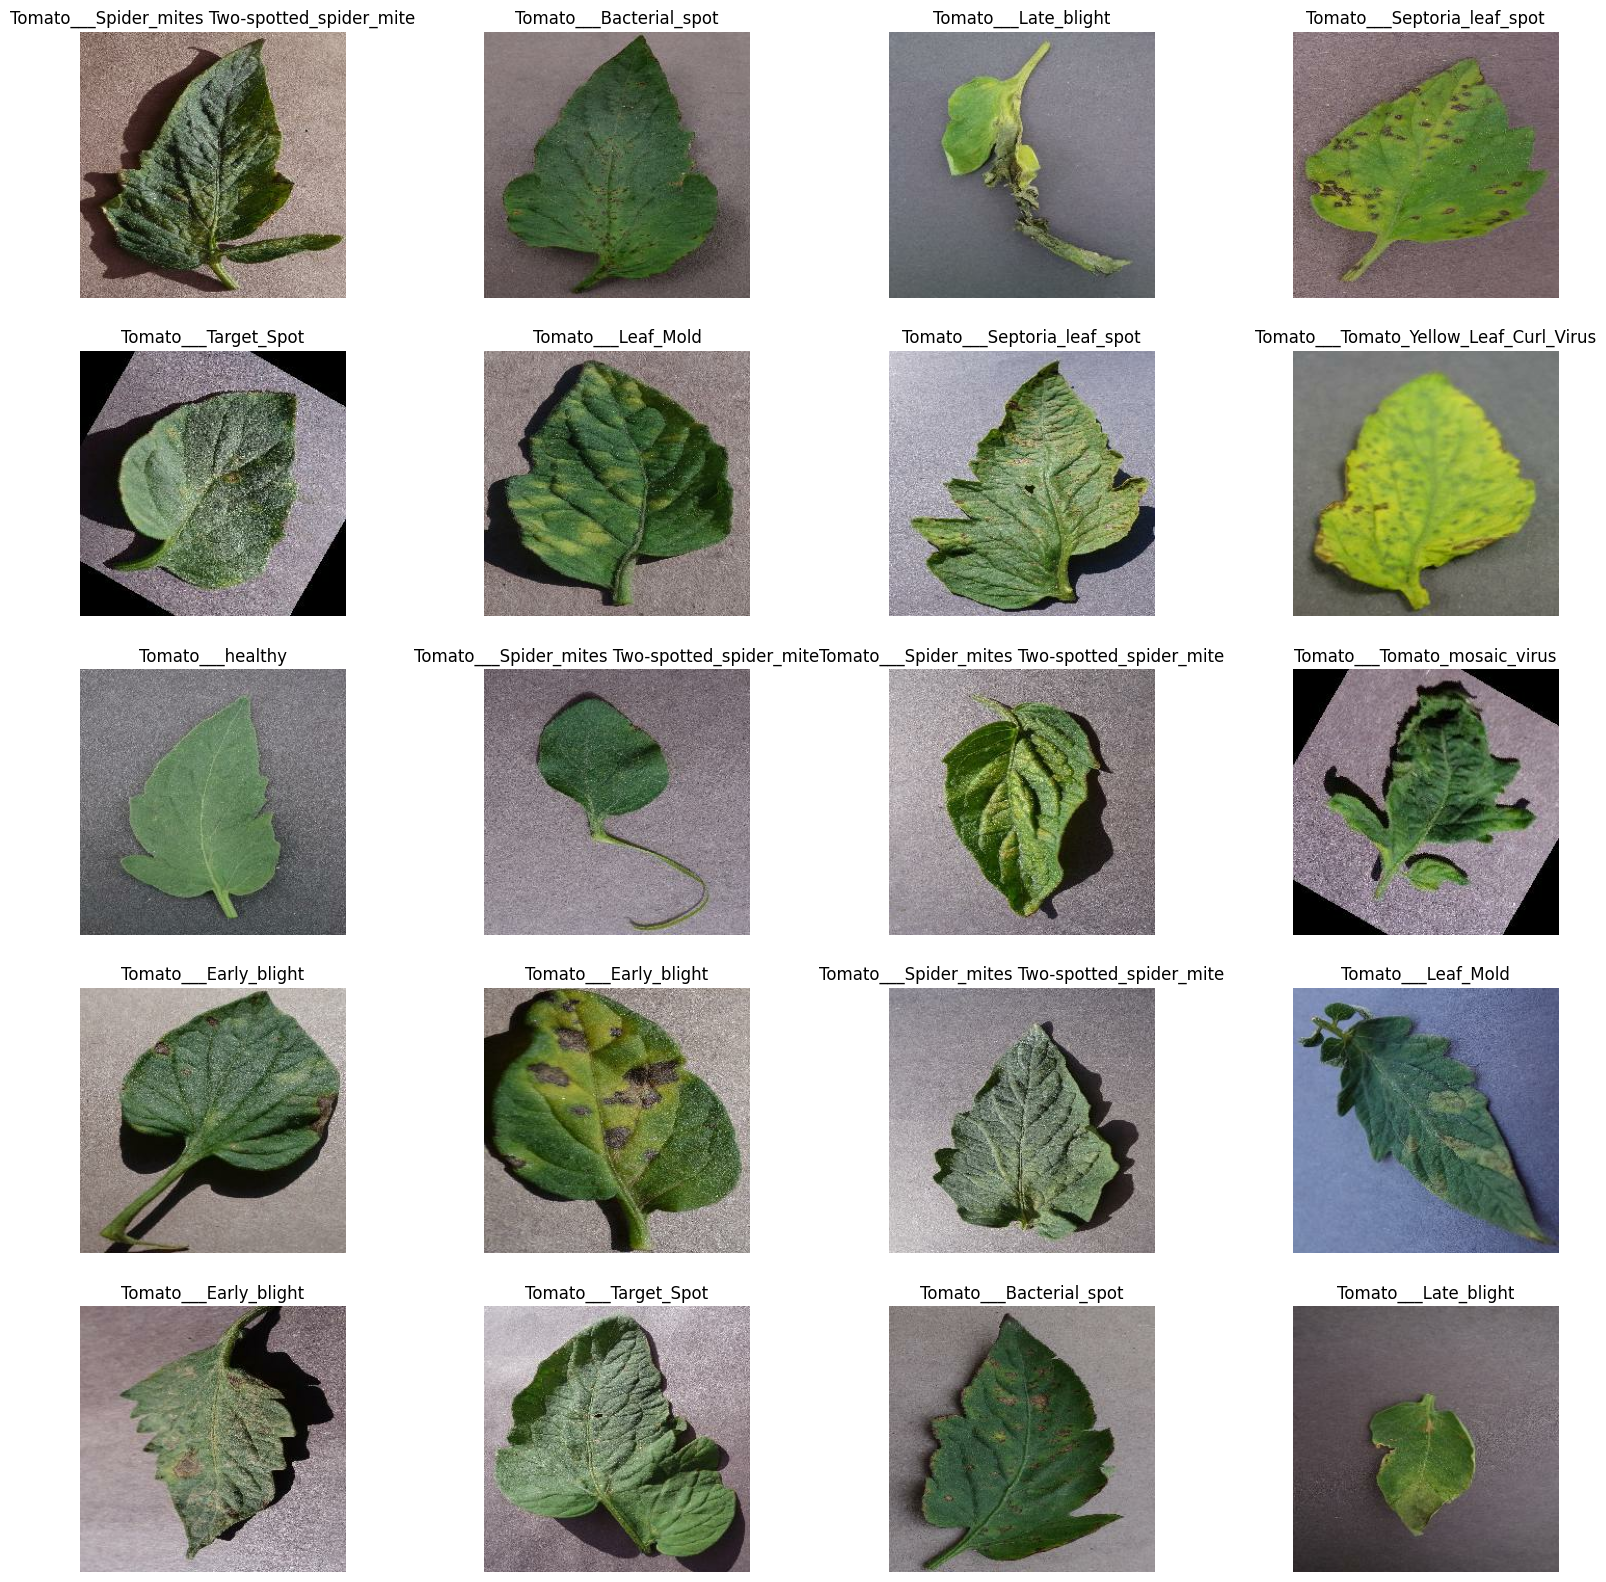

In [ ]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train_data.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_label[image_label[i].numpy()])
        plt.axis("off")

# Resizing and Scaling

In [ ]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(256,256),
    tf.keras.layers.Rescaling(1.0/255)
])

# Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomRotation(0.2)
])

# CNN Model

In [ ]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=64
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=120, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=100, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=80, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#   # Convolution layer 4
#   tf.keras.layers.Conv2D(filters=60, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
#   tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=1000,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=250,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=10,activation='softmax')

])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (64, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (64, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (64, 256, 256, 120)         │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (64, 128, 128, 120)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (64, 128, 128, 100)         │         108,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (64, 64, 64, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (64, 64, 64, 80)            │          72,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (64, 32, 32, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (64, 81920)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 1000)                  │      81,921,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (64, 1000)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 500)                   │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (64, 500)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (64, 250)                   │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (64, 250)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (64, 10)                    │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,732,800 (315.60 MB)

 Trainable params: 82,732,800 (315.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# import tensorflow_hub as hub
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.optimizers import Adam

# # Load pre-trained MobileNetV2 model without the top (fully connected) layers
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# # Create a sequential model
# model = Sequential()

# # Add the pre-trained base model
# model.add(base_model)

# # Add custom dense layers for binary classification
# #model.add(GlobalAveragePooling2D())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# # Freeze the layers of the pre-trained model
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model architecture
# model.summary()

In [ ]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train_data ,  batch_size=32 ,epochs=40,
                validation_data=val_data) # epochs=20

Epoch 1/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 119s 374ms/step - accuracy: 0.1380 - loss: 2.3336 - val_accuracy: 0.2558 - val_loss: 2.0456
Epoch 2/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 101s 350ms/step - accuracy: 0.2417 - loss: 2.0260 - val_accuracy: 0.4689 - val_loss: 1.4892
Epoch 3/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 147s 368ms/step - accuracy: 0.4737 - loss: 1.4492 - val_accuracy: 0.4992 - val_loss: 1.5316
Epoch 4/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 137s 349ms/step - accuracy: 0.6462 - loss: 0.9659 - val_accuracy: 0.6031 - val_loss: 1.4578
Epoch 5/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 105s 367ms/step - accuracy: 0.7495 - loss: 0.7082 - val_accuracy: 0.6840 - val_loss: 1.0816
Epoch 6/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 137s 349ms/step - accuracy: 0.8114 - loss: 0.5540 - val_accuracy: 0.7880 - val_loss: 0.6591
Epoch 7/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 105s 366ms/step - accuracy: 0.8316 - loss: 0.4988 - val_accuracy: 0.6733 - val_loss: 1.4283
Epoch 8/40
287/287 ━━━━━━━━━━━━━━━━━━━━ 142s 366ms/step - accuracy: 0.8478 -

In [ ]:
save_dir = "/content/drive/MyDrive/"  # Change path if needed
os.makedirs(save_dir, exist_ok=True)
model_save_path = os.path.join(save_dir, "march16.h5")
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/MyDrive/my_model.h5


In [ ]:
y_pred = model.predict(val_data)
y_pred1 = [np.argmax(i) for i in y_pred]
y_pred1[:10]

72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step


[1, 2, 9, 7, 7, 0, 4, 0, 6, 4]

In [ ]:
d = {}
for i in y_pred1:
    d[i]=y_pred1.count(i)
d

{1: 485,
 2: 465,
 9: 669,
 7: 450,
 0: 412,
 4: 419,
 6: 436,
 3: 422,
 8: 426,
 5: 401}

# Accuracy and Loss

In [ ]:
loss,acc = model.evaluate(train_data)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test_data)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)



287/287 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.9064 - loss: 0.4164
Loss on Train data: 0.4252391755580902
Accuracy on Train data: 0.9077677726745605
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9400 - loss: 0.1881
Loss on Test data: 0.18805359303951263
Accuracy on Test data: 0.9399999976158142


In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]



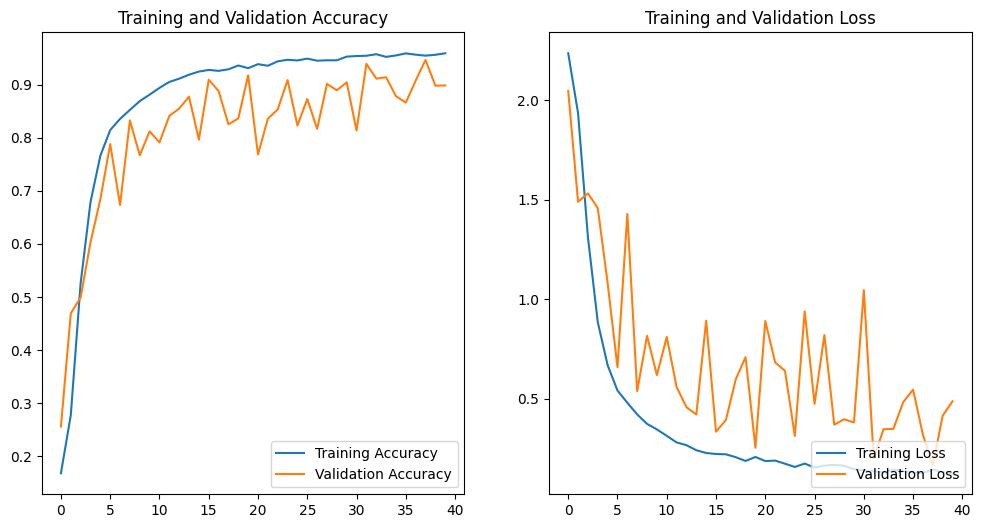

In [ ]:
EPOCHS=40
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

# Image Prediction

In [ ]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_label[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


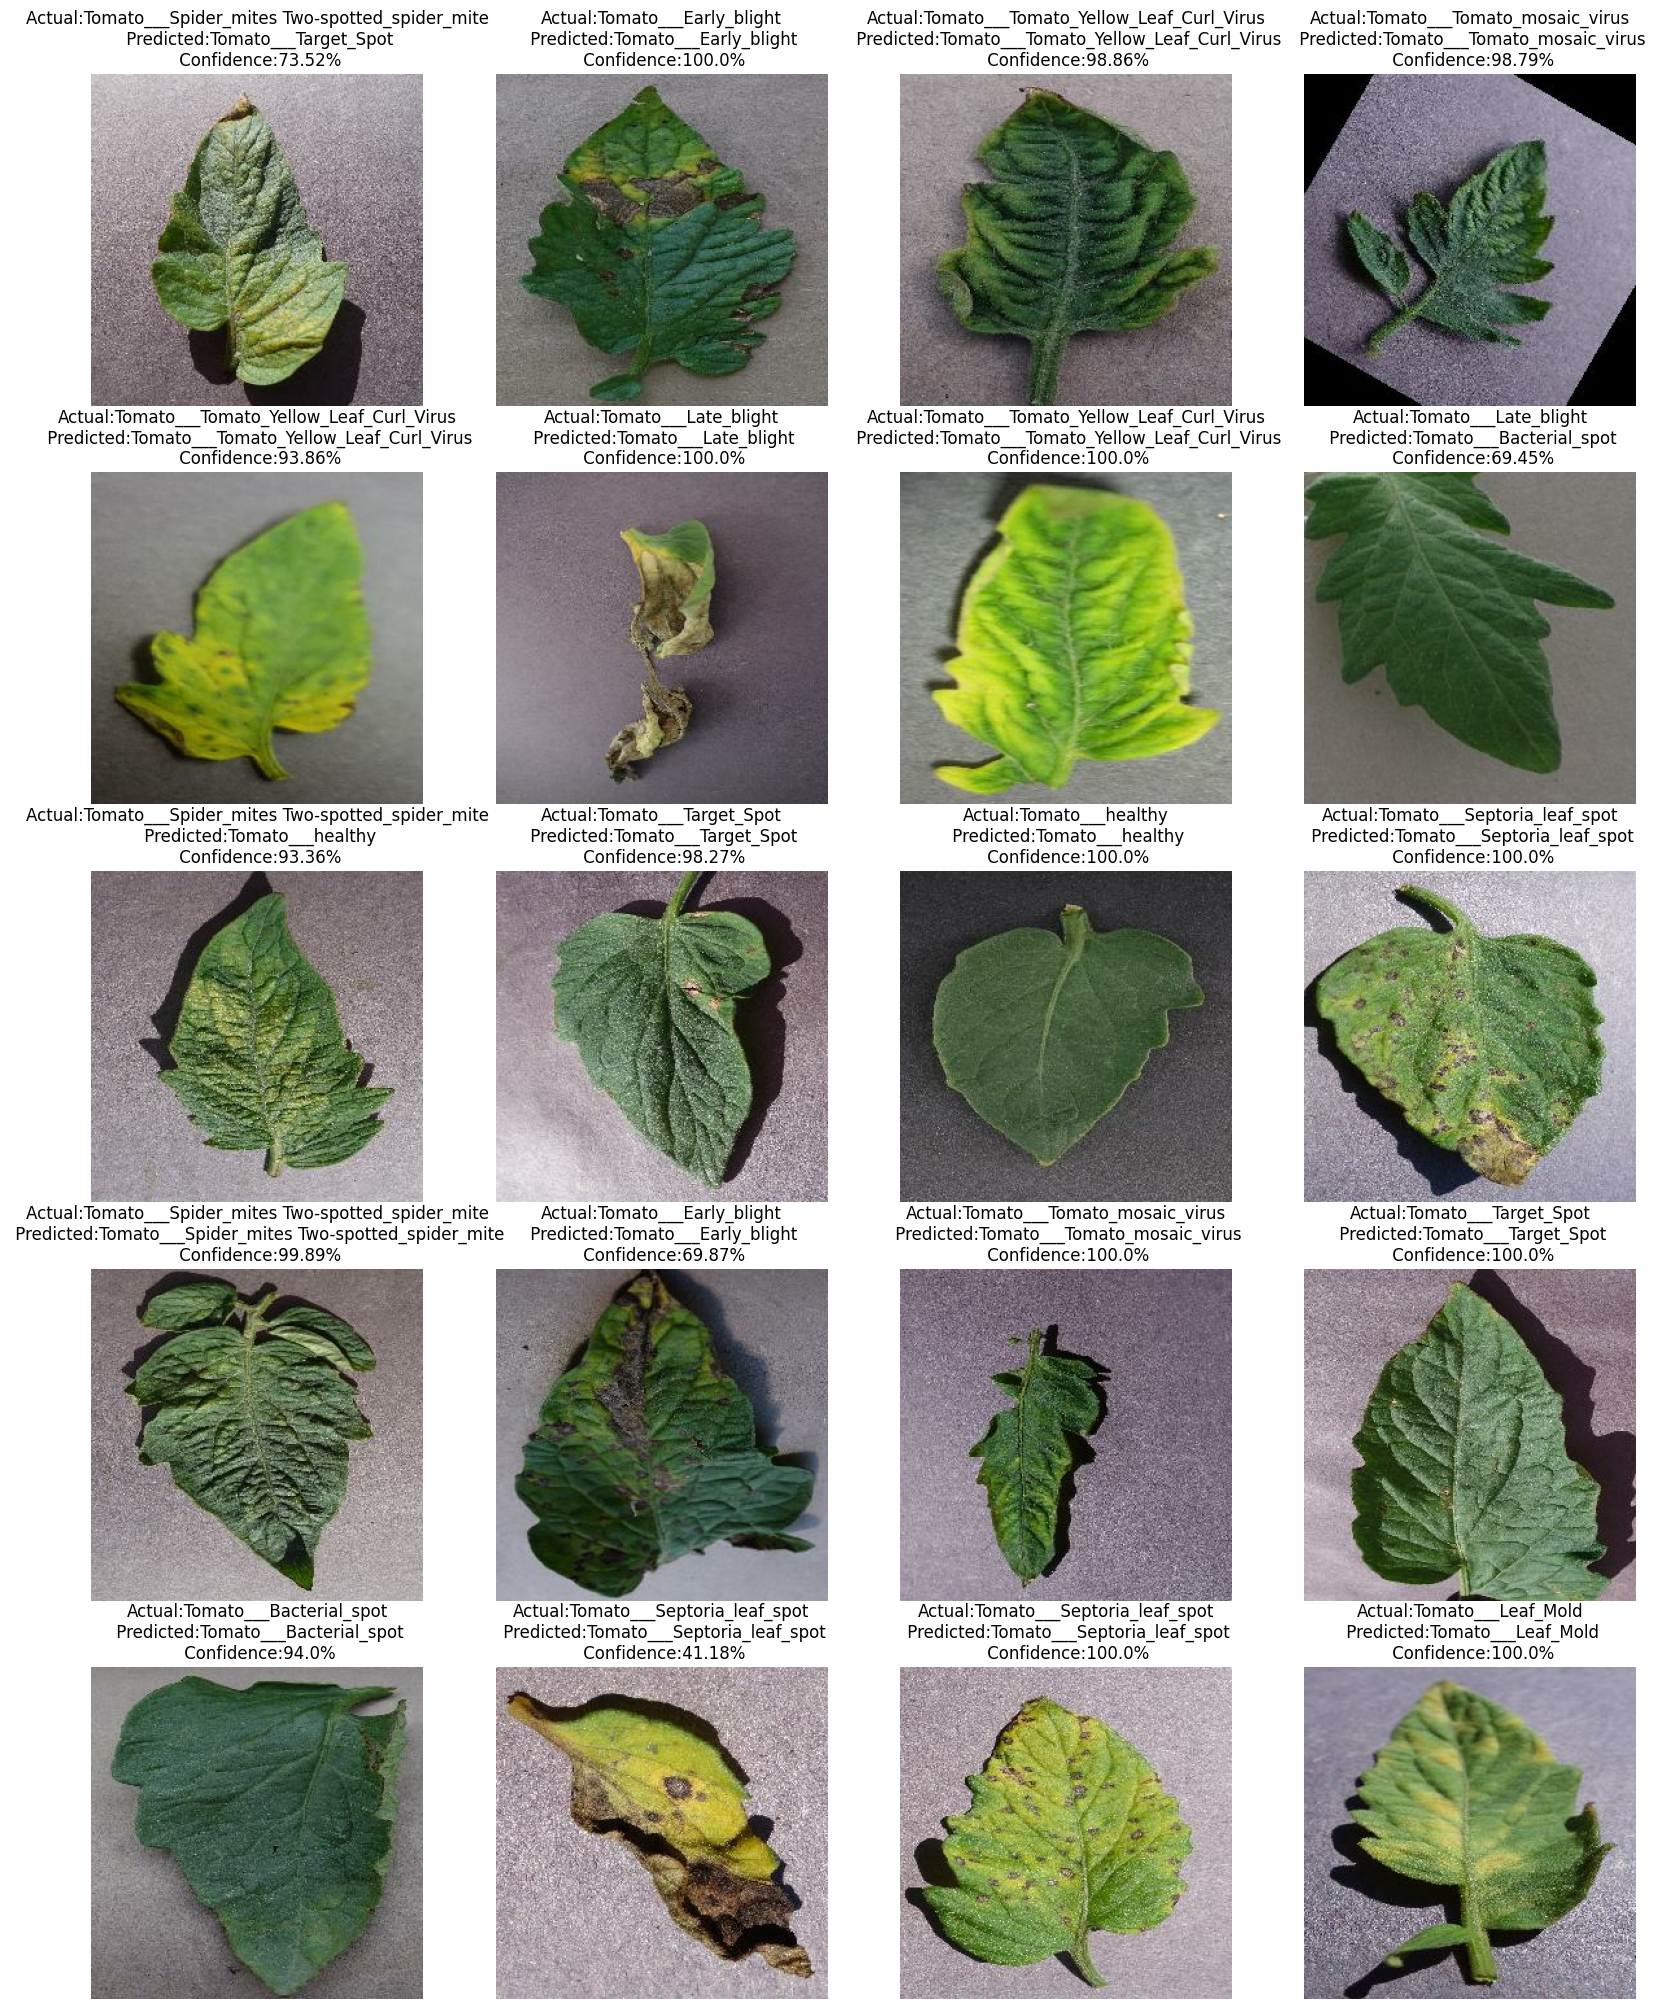

In [ ]:
plt.figure(figsize=(20,25))
for images , labels in test_data.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_label[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_label[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━

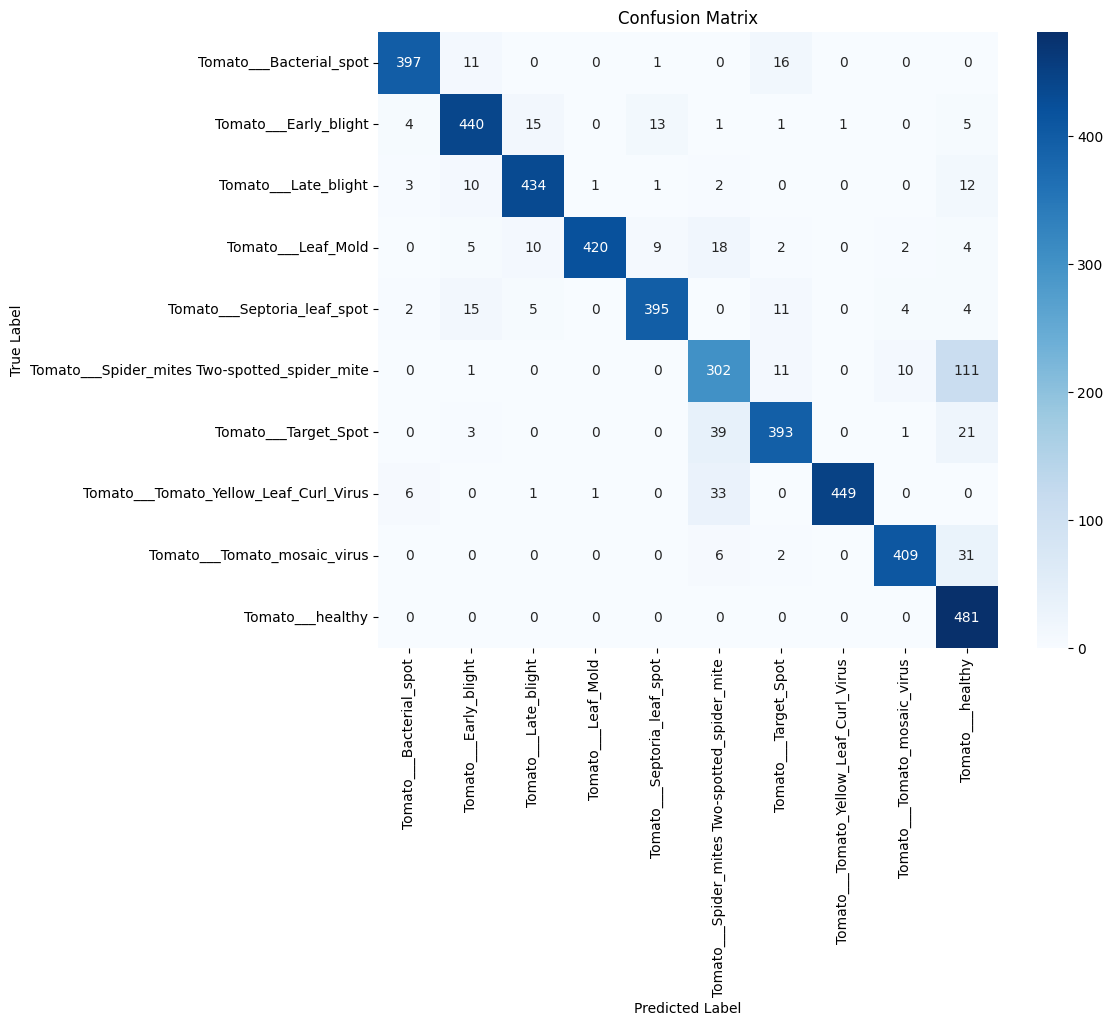

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true and predicted labels
y_true = []
y_pred = []

for images, labels in val_data:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_label)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_label, yticklabels=class_label)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


*1*. ROC-AUC Score (Receiver Operating Characteristic - Area Under Curve)
Measures how well the model separates classes.
Useful for binary classification.

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict(val_data)  # Get probability predictions
auc_score = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
print("ROC-AUC Score:", auc_score)


72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step
ROC-AUC Score: 0.49838909745842397


2. Log Loss (Cross-Entropy Loss)
Measures the probability predictions against true labels.

In [ ]:
from sklearn.metrics import log_loss

y_prob = model.predict(val_data)  # Get probability predictions
loss = log_loss(y_true, y_prob)
print("Log Loss:", loss)


72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step
Log Loss: 11.491621864712778


3. Cohen’s Kappa Score
Measures agreement between predicted and actual labels.

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_true, y_pred)
print("Cohen’s Kappa Score:", kappa_score)


Cohen’s Kappa Score: 0.8872611452843084


4. Matthews Correlation Coefficient (MCC)

1.   List item
2.   List item


Works well for imbalanced datasets.

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_true, y_pred)
print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.8882439754500485


5. Balanced Accuracy
Useful when dealing with imbalanced datasets.
python
Copy
Edit


In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_true, y_pred)
print("Balanced Accuracy:", balanced_acc)


Balanced Accuracy: 0.8971211717624259


## Prediction On User Inputs

In [ ]:
import pickle
import json

In [ ]:
class_label

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
json_data = {"Label":class_label}
json_data['Label'][2]

'Tomato___Late_blight'

In [ ]:
with open("class_label_data.json","w") as file:
    json.dump(json_data, file)

In [ ]:
import json
import numpy as np
from tensorflow import keras
from PIL import Image

# Load the model
model = keras.models.load_model("/content/drive/MyDrive/Tomato_march1.keras")  # Update with your model's path

# Function to classify an image
def classify_image(image_path):
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = image.resize((256, 256))
    image = np.array(image) # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    y_pred = model.predict(image)
    y_pred1 = np.argmax(y_pred)

    print("Predicted Label:", y_pred1)
    return y_pred

# Test the model with an image
image_path = "/root/.cache/kagglehub/datasets/shylesh101/tomato-leaf-disease/versions/1/tomato_dataset/valid/Tomato___Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169_270deg.JPG"
label = classify_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Label: 2


In [ ]:
label_path = "class_label_data.json"
def load_label_data(path):
    with open(path,"r") as file:
        data = json.load(file)
    return data

cls_label = load_label_data(label_path)

In [ ]:
from tensorflow.keras.models import load_model

# Ensure the model is properly instantiated before saving
# model = ...  (Make sure your model is defined before saving)

save_directory = "/content/drive/MyDrive"  # Change this path as needed

# Save in the recommended Keras format
model.save(f"{save_directory}/mar16tomato.keras")

# Optionally, save in the current directory
model.save("mar16tomato.keras")
